In [36]:
# Load training data and simple statistics 
import os,tarfile
import pandas as pd
import numpy as np
DATA_PATH = "datasets"
TRAINING_DATA = "data_coding_exercise.txt"

def load_data(data_path = DATA_PATH, data = TRAINING_DATA):
    file_path = os.path.join(data_path, data)
    return pd.read_csv(file_path, sep = '\t',  names = ["Agent", "AgentFamily", "Version"])

agent = load_data()
agent.head()


,Agent,AgentFamily,Version
0,Mozilla/5.0 (Windows NT 6.2) AppleWebKit/537.3...,Chrome,39
1,Mozilla/5.0 (Linux; Android 4.1.1; GT-N8010 Bu...,Chrome,54
2,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,Chrome,39
3,Mozilla/5.0 (Windows NT 6.3; Win64; x64) Apple...,Chrome,45
4,Mozilla/5.0 (Windows NT 6.2) AppleWebKit/537.3...,Chrome,37


In [21]:
#check examples of the description and get an idea of token separator 
agent_description = list(agent['Agent'])
for i in range(10):
    print(agent_description[i])

Mozilla/5.0 (Windows NT 6.2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2195.31 Safari/537.36
Mozilla/5.0 (Linux; Android 4.1.1; GT-N8010 Build/JRO03C) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2840.85 Safari/537.36
Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2175.61 Safari/537.36
Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/45.0.2480.83 Safari/537.36
Mozilla/5.0 (Windows NT 6.2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2072.40 Safari/537.36
Mozilla/5.0 (Windows NT 5.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/45.0.2469.28 Safari/537.36
Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/33.0.1808.66 Safari/537.36
Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2296.3 Safari/537.36
Mozilla/5.0 (Windows NT 5.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1975.31 Safari

In [29]:
#check the family of agents
agent_family = set(list(agent['AgentFamily']))
print(agent_family)

{'Amazon Silk', 'AppleMail', 'Edge', 'Opera', 'YandexSearch', 'Edge Mobile', 'IE', 'Firefox iOS', 'Sogou Explorer', 'BlackBerry WebKit', 'Chrome Mobile iOS', 'Chrome Mobile', 'Android', 'QQ Browser Mobile', 'Puffin', 'Facebook', 'Firefox Mobile', 'Firefox', 'IE Mobile', 'QQ Browser', 'UC Browser', 'AOL', 'Opera Mobile', 'Safari', 'Maxthon', 'Mobile Safari', 'Chrome', 'Opera Mini'}


In [8]:
#check size and some simple statistics 
agent.describe()

,Agent,AgentFamily,Version
count,421215,421215,421215
unique,421215,28,118
top,Mozilla/5.0 (Linux; Android 4.2.2; ALCATEL ONE...,Chrome,33
freq,1,308656,25755


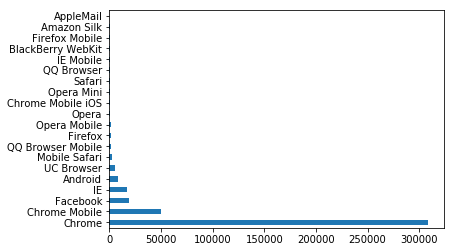

In [93]:
agent["AgentFamily"].value_counts()[:20].plot(kind='barh')


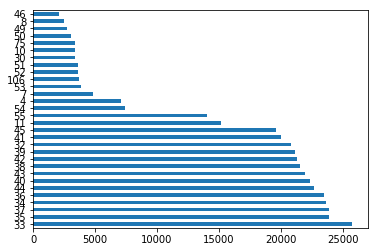

In [94]:

#%matplotlib inline
import matplotlib.pyplot as plt
agent["Version"].value_counts()[:30].plot(kind='barh')


In [ ]:
#split into training set and test set 
from sklearn.model_selection  import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(agent, agent["AgentFamily"]):
    strat_train_set = agent.loc[train_index]
    strat_test_set = agent.loc[test_index]
    
agent_training = strat_train_set.copy()

In [87]:
#extract features from agent description
from sklearn.feature_extraction.text import CountVectorizer
agent_training_description = list(agent_training['Agent'])
# TO DO: tune ngram_range, max_features
#vectorizer = CountVectorizer(input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, stop_words=None, token_pattern="(?u)\b\w\w+\b", ngram_range=(1, 1), analyzer='word', max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False,)
vectorizer = CountVectorizer(ngram_range=(2, 2))
#try default analyzer
analyze = vectorizer.build_analyzer()
for i in range(5):
    print(agent_training_description[i])
    print(analyze(agent_training_description[i]))


Mozilla/5.0 (Windows NT 6.2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2195.31 Safari/537.36
['mozilla windows', 'windows nt', 'nt applewebkit', 'applewebkit 537', '537 36', '36 khtml', 'khtml like', 'like gecko', 'gecko chrome', 'chrome 39', '39 2195', '2195 31', '31 safari', 'safari 537', '537 36']
Mozilla/5.0 (Linux; Android 4.1.1; GT-N8010 Build/JRO03C) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2840.85 Safari/537.36
['mozilla linux', 'linux android', 'android gt', 'gt n8010', 'n8010 build', 'build jro03c', 'jro03c applewebkit', 'applewebkit 537', '537 36', '36 khtml', 'khtml like', 'like gecko', 'gecko chrome', 'chrome 54', '54 2840', '2840 85', '85 safari', 'safari 537', '537 36']
Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2175.61 Safari/537.36
['mozilla windows', 'windows nt', 'nt wow64', 'wow64 applewebkit', 'applewebkit 537', '537 36', '36 khtml', 'khtml like', 'like gecko', 'gecko chrome', 'chrome 39', '39 2175', '2

In [89]:
X = vectorizer.fit_transform(agent_training_description)
X

<421215x152044 sparse matrix of type '<class 'numpy.int64'>'
	with 7022630 stored elements in Compressed Sparse Row format>

In [90]:
#show the top 10 frequent words and their frequency of the default vectorizer
low_frequency_keys = sorted(vectorizer.vocabulary_, key=vectorizer.vocabulary_.get, reverse=True)[:100]
for k in low_frequency_keys:
    print(k, vectorizer.vocabulary_[k]/len(agent))


zz zz 0.360962928671
zz samsung 0.360960554586
zytir1ppxok cgih0e 0.360958180502
zyipbdtxzdc chbok5 0.360955806417
zxeozyi_vew rv 0.360953432333
zx840hd build 0.360951058248
zx rk2926 0.360948684164
zx d23 0.360946310079
zx a13 0.360943935995
zx 2926d 0.36094156191
zwrz1i0ex chcxvo 0.360939187826
zvii build 0.360936813741
zvi imm76d 0.360934439657
zvc gwk74 0.360932065572
zvav es 0.360929691488
zvav de 0.360927317403
zv5 vm696 0.360924943319
zv5 gwk74 0.360922569234
zv4 gwk74 0.36092019515
zuum_zen_i build 0.360917821065
zuum_e40 build 0.360915446981
zuum pro 0.360913072896
zuum magnux 0.360910698812
zuum forza 0.360908324727
zurich financial 0.360905950643
zur805s build 0.360903576558
zune net4 0.360901202474
zune ms 0.360898828389
zune mcafee 0.360896454305
zune creative 0.36089408022
zune bri 0.360891706136
zune asktborj 0.360889332051
zun xs 0.360886957967
zuk zuk 0.360884583882
zuk z2151 0.360882209798
zuk z2132 0.360879835713
zuk z2131 0.360877461629
zuk z2121 0.360875087544
zuk 

In [91]:
#show the bottom 10 frequent words and its frequency of the default vectorizer
low_frequency_keys = sorted(vectorizer.vocabulary_, key=vectorizer.vocabulary_.get)[:100]
for k in low_frequency_keys:
    print(k, vectorizer.vocabulary_[k]/len(agent))

00 00 0.0
00 02 2.37408449367e-06
00 04 4.74816898733e-06
00 05 7.122253481e-06
00 161 9.49633797467e-06
00 23 1.18704224683e-05
00 33 1.4244506962e-05
00 3990 1.66185914557e-05
00 40 1.89926759493e-05
00 applewebkit 2.1366760443e-05
00 boie8 2.37408449367e-05
00 build 2.61149294303e-05
00 d1 2.8489013924e-05
00 kr 3.08630984177e-05
00 lge 3.32371829113e-05
00 mv 3.5611267405e-05
00 net 3.79853518987e-05
00 presto 4.03594363923e-05
00 rog 4.2733520886e-05
00 safari 4.51076053797e-05
00 samsung 4.74816898733e-05
00 slcc2 4.9855774367e-05
00 u2 5.22298588607e-05
00 windows 5.46039433543e-05
00 wv 5.6978027848e-05
000 33 5.93521123417e-05
000 88 6.17261968353e-05
000 applewebkit 6.4100281329e-05
000 build 6.64743658227e-05
0000 0000 6.88484503163e-05
0000 000000004000 7.122253481e-05
0000 applewebkit 7.35966193037e-05
0000 build 7.59707037973e-05
00000000 0000 7.8344788291e-05
000000004000 koboaffiliate 8.07188727847e-05
00000000877d windows 8.30929572783e-05
000000062262 windows 8.546704

In [92]:
#apply  Tf–idf term weighting
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False)
tfidf = transformer.fit_transform(X.toarray())
tfidf.toarray() 

<20x152044 sparse matrix of type '<class 'numpy.int64'>'
	with 320 stored elements in Compressed Sparse Row format>

In [ ]:
#Train the classifier 

In [97]:
# Load test data 

DATA_PATH = "datasets"
TRAINING_DATA = "test_data_coding_exercise.txt"

def load_data(data_path = DATA_PATH, data = TRAINING_DATA):
    file_path = os.path.join(data_path, data)
    return pd.read_csv(file_path, sep = '\t',  names = ["Agent", "AgentFamily", "Version"])

agent_test = load_data()
agent_test.head()


,Agent,AgentFamily,Version
0,Mozilla/5.0 (Windows NT 6.2; Win64; x64) Apple...,Chrome,39
1,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.3...,Chrome,32


In [99]:
#transfrom the test data set
vectorizer.transform(agent_test["Agent"]).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
#make prediction